In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('fraudTest.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
df=df.drop(['Unnamed: 0','cc_num','merchant','first','last','street','unix_time'],axis=1)

In [4]:
df=df.dropna()

In [5]:
# no null value exist->false
df.isnull().values.any()

False

In [6]:
df.isnull().sum()

trans_date_trans_time    0
category                 0
amt                      0
gender                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   category               555719 non-null  object 
 2   amt                    555719 non-null  float64
 3   gender                 555719 non-null  object 
 4   city                   555719 non-null  object 
 5   state                  555719 non-null  object 
 6   zip                    555719 non-null  int64  
 7   lat                    555719 non-null  float64
 8   long                   555719 non-null  float64
 9   city_pop               555719 non-null  int64  
 10  job                    555719 non-null  object 
 11  dob                    555719 non-null  object 
 12  trans_num              555719 non-null  object 
 13  merch_lat              555719 non-null  float64
 14  merch_long             555719 non-nu

In [8]:
 fraud_cases=len(df[df['is_fraud']==1])
print('Number of Fraud Cases:',fraud_cases)

Number of Fraud Cases: 2145


In [9]:
non_fraud_cases=len(df[df['is_fraud']==0])
print('Number of non fraud cases:',non_fraud_cases)

Number of non fraud cases: 553574


In [10]:
fraud_data=df[df['is_fraud']==1]
normal_data=df[df['is_fraud']==0]

In [11]:
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']


In [12]:
label_encoder = LabelEncoder()
X_encoded = X.copy()

categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X_encoded[col]=label_encoder.fit_transform(X[col])


In [13]:
X_encoded

,trans_date_trans_time,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long
0,0,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,275,376,98699,33.986391,-81.200714
1,1,10,29.84,0,16,43,84002,40.3207,-110.4360,302,392,760,108785,39.450498,-109.960431
2,2,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,259,421,433979,40.495810,-74.196111
3,3,9,60.05,1,764,8,32780,28.5697,-80.8191,54767,407,718,71993,28.812398,-80.883061
4,4,13,3.19,1,247,21,49632,44.2529,-85.0170,1126,196,177,190585,44.959148,-85.884734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,544755,5,43.77,1,443,23,63453,40.4931,-91.8912,519,460,334,336391,39.946837,-91.333331
555715,544756,7,111.84,1,401,42,77566,29.0393,-95.4401,28739,198,890,70372,29.661049,-96.186633
555716,544757,7,86.88,0,104,46,99323,46.1966,-118.9017,3684,294,609,235088,46.658340,-119.715054
555717,544758,13,7.99,1,476,12,83643,44.6255,-116.4493,129,58,331,43546,44.470525,-117.080888


In [14]:
data=X_encoded[['trans_date_trans_time','category','amt','gender','city','state','lat','zip','long','city_pop','trans_num','merch_lat','merch_long']]

In [15]:
correlation_matrix = data.corr()
print(correlation_matrix)

                       trans_date_trans_time  category       amt    gender  \
trans_date_trans_time               1.000000  0.001470 -0.001132 -0.000482   
category                            0.001470  1.000000  0.026811 -0.027684   
amt                                -0.001132  0.026811  1.000000  0.000027   
gender                             -0.000482 -0.027684  0.000027  1.000000   
city                               -0.001772 -0.001949  0.000576  0.016914   
state                              -0.000133  0.000169 -0.002561 -0.030149   
lat                                 0.000334 -0.008215  0.002339  0.042692   
zip                                 0.001476  0.004510  0.002310 -0.066467   
long                               -0.001556 -0.002902 -0.002046  0.051235   
city_pop                           -0.000793  0.009164  0.002760 -0.029367   
trans_num                           0.001367 -0.001348 -0.002609 -0.000446   
merch_lat                           0.000393 -0.008180  0.002404

In [16]:
X=X_encoded.drop(['trans_date_trans_time','trans_num','merch_lat','merch_long'],axis=1)

In [17]:
X.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob
0,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,275,376
1,10,29.84,0,16,43,84002,40.3207,-110.4360,302,392,760
2,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,259,421
3,9,60.05,1,764,8,32780,28.5697,-80.8191,54767,407,718
4,13,3.19,1,247,21,49632,44.2529,-85.0170,1126,196,177


In [18]:
# Handling imbalanced data with SMOTE
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)
y_res.value_counts()

is_fraud
0    553574
1    553574
Name: count, dtype: int64

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[ 0.96260043,  0.55844514, -0.90636563, ..., -0.21921394,
         1.48338017, -1.71351681],
       [-1.59329162,  0.4344708 , -0.90636563, ..., -0.28834835,
         1.03607319,  0.60258706],
       [-0.5709348 ,  0.2624818 ,  1.1033075 , ..., -0.29074021,
        -0.02719751, -0.68197475],
       ...,
       [ 0.70701122,  0.48972576,  1.1033075 , ..., -0.27415021,
        -0.84114955, -1.00895412],
       [ 0.96260043, -0.29432305,  1.1033075 , ..., -0.28966903,
        -0.33517936, -1.23472559],
       [-0.05975639,  0.06242075,  1.1033075 , ..., -0.28723392,
        -1.17113011,  0.58701662]])

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_test)
print(accuracy_score(y_test,y_pred1))


0.9959691931188368


In [23]:
conf_matrix=confusion_matrix(y_test,y_pred1)
class_report = classification_report(y_test,y_pred1)


print("Confusion Matrix",conf_matrix)
print("Classification Report")
print(class_report)


Confusion Matrix [[110696     40]
 [   408      0]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110736
           1       0.00      0.00      0.00       408

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



In [24]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)


In [25]:
from sklearn.linear_model import LogisticRegression

LR1 = LogisticRegression(class_weight='balanced')
LR1.fit(X_train, y_train)
y_pred2 = LR1.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.9419761750521846


In [26]:
conf_matrix=confusion_matrix(y_test,y_pred2)
class_report = classification_report(y_test,y_pred2)


print("Confusion Matrix",conf_matrix)
print("Classification Report")
print(class_report)


Confusion Matrix [[104392   6344]
 [   105    303]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    110736
           1       0.05      0.74      0.09       408

    accuracy                           0.94    111144
   macro avg       0.52      0.84      0.53    111144
weighted avg       1.00      0.94      0.97    111144



### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred3 = RF.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.9981645432951847


In [28]:
conf_matrix=confusion_matrix(y_test,y_pred2)
class_report = classification_report(y_test,y_pred2)


print("Confusion Matrix",conf_matrix)
print("Classification Report")
print(class_report)

Confusion Matrix [[104392   6344]
 [   105    303]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    110736
           1       0.05      0.74      0.09       408

    accuracy                           0.94    111144
   macro avg       0.52      0.84      0.53    111144
weighted avg       1.00      0.94      0.97    111144



### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred4 = dt.predict(X_test)
print(accuracy_score(y_test,y_pred4))


0.9970308788598575


In [30]:
conf_matrix=confusion_matrix(y_test,y_pred4)
class_report = classification_report(y_test,y_pred4)


print("Confusion Matrix",conf_matrix)
print("Classification Report")
print(class_report)

Confusion Matrix [[110562    174]
 [   156    252]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110736
           1       0.59      0.62      0.60       408

    accuracy                           1.00    111144
   macro avg       0.80      0.81      0.80    111144
weighted avg       1.00      1.00      1.00    111144



In [31]:
final_data=pd.DataFrame({'Models':['LR','LR1','RF','dt'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4)]})

In [32]:
final_data

,Models,ACC
0,LR,0.995969
1,LR1,0.941976
2,RF,0.998165
3,dt,0.997031


<Axes: xlabel='Models', ylabel='ACC'>

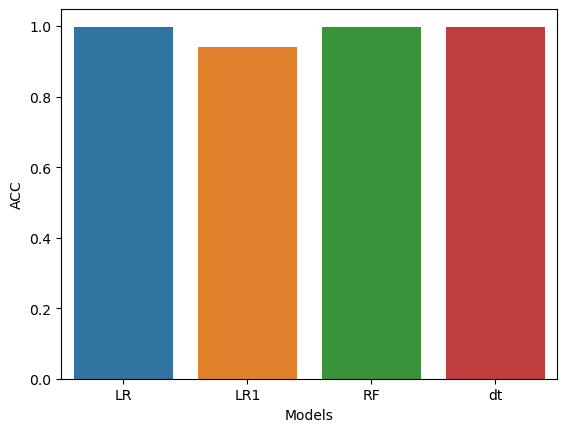

In [33]:
import seaborn as sns
sns.barplot(x='Models',y='ACC',data=final_data)

### As Decision Tree has a good precision Score for both the class so it is good model for this data set 